## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

When our team began thinking of problems to investigate, we wanted to focus on issues that not only helped 1 specific industry as stakeholders, but everyday people like ourselves. Eventually, we came to the agreement to look at movies, specifically factors that would contribute to a movie that is high-grossing. From this, us and our stakeholders can better assess the revenue of a movie by examining a variety of factors and make decisions based on our understanding of the relationships we find. 

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. Interpret the problem as inference and/or prediction.

We are interested in understanding which factors contribute to the gross revenue of a movie, especially a high-grossing movie. By looking at a number of different variables, including budget, genre, rating, and continent, we hope to better understand the relationships between these factors and the gross revenue of a movie. This is an inference problem since we are trying to understand the relationships between different predictors and the gross revenue rather than actually predicting the gross revenue of a movie.

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

Our data, "Movies Industry", is from user Daniel Grijalva on Kaggle [1]. The dataset provides information on 6820 movies (220 movies per year, 1986-2016). The data was scraped from IMDb. While the dataset contained 16 variables, we only used the following 9 to develop our model: `budget` (the budget of a movie), `country` (country of origin), `genre` (main genre of the movie), `rating` (rating of the movie-- R, PG, etc.), `runtime` (duration of the movie), `score` (IMDb user rating), `votes` (number of user votes), `year` (year of release), and `released` (release date (YYYY-MM-DD)). `gross` (revenue of the movie) was our response.

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

We have three main stakeholders:

1. **Filmmakers, such as directors and producers, and investors in the film industry:**
By understanding key relationships between revenue and variables such as actors, year, etc., filmmakers can strategically make decisions about their movies to attain the most revenue possible. Investors in the film industry and studio executives will be interested in our analysis for the same reasons as filmmakers. If investors understand the key relationships that we will analyze, such as an actor that is consistently in top grossing movies, investors can better assess if a movie is worth investing in.

2. **Everyday movie goers (like us!):**
If a movie has a high gross revenue, it’s normally safe to assume the movie is good and worthwhile. Understanding the relationships found in our model can help everyday movie goers enhance their experiences by watching high-grossing movies. 

3. **People looking for/approached to have their work be adapted into a film:**
Similar to filmmakers, if someone is going to have their work turned into a movie, they can use the relationships that we find in our model to determine if this venture is worthwhile or if they need to make some adjustments. For example, the genre of true crime has boomed in the last few years; if someone has a story relating to true crime, whether they are a victim who wants to tell a story or have written a fictional story, they can use this relationship to their advantage and have their movie be more popular/more fruitful now than it would have been in the past. Understanding these relationships of what will make their movie successful.

## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

If the tables in this section take too much space, you may put them in the appendix, and just mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your final model(s).

In [10]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import time

In [11]:
train = pd.read_csv('train.csv')
train.drop(['Unnamed: 0'], axis = 1, inplace = True)
test = pd.read_csv('test.csv')
test.drop(['Unnamed: 0'], axis = 1, inplace = True)
train_filtered = pd.read_csv('train_filtered.csv')
train_filtered.drop(['Unnamed: 0'], axis = 1, inplace = True)

Before the data could be used for model development, existing predictors were created from new predictors. Using the `country` for each movie, a `continent` variable was created for each movie to generalize the region of origin for each movie (since country is very specific). Also, the `released` variable from the original dataset was used to create a `month` variable for each movie (reflecting the month in which the movie was released) in order to see seasonal/yearly trends in the data. Furthermore, since the author of the dataset indicated that some observations were missing key vairables (such as `budget`), we cleaned our dataset by dropping rows with missing values since these would not be beneficial to our analysis.

The distribution of the continuous variables used in the analysis is:

In [12]:
train.describe()

,year,score,votes,budget,gross,runtime
count,4333.000000,4333.000000,4.333000e+03,4.333000e+03,4.333000e+03,4333.000000
mean,2001.650127,6.393423,1.137214e+05,3.551015e+07,1.013485e+08,108.033003
std,10.523372,0.961558,1.810635e+05,4.152628e+07,1.895646e+08,17.910908
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.063962e+07,95.000000
50%,2002.000000,6.500000,5.300000e+04,2.100000e+07,3.566902e+07,105.000000
75%,2011.000000,7.000000,1.280000e+05,4.300000e+07,1.072174e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,242.000000


The distribution of the categorical variables used in the analysis is:

In [13]:
train.describe(include=object)

,rating,genre,month,continent
count,4333,4333,4333,4333
unique,10,15,12,6
top,R,Comedy,October,North_America
freq,2108,1189,425,3556


In [26]:
print('The number of missing values in our dataset for each variable is:')
train[['rating','genre','month','continent']].isnull().sum()

The number of missing values in our dataset for each variable is:


rating       0
genre        0
month        0
continent    0
dtype: int64

In [88]:
value_counts_rating = train['rating'].value_counts().rename_axis('value').reset_index(name='counts')
value_counts_genre = train['genre'].value_counts().rename_axis('value').reset_index(name='counts')
value_counts_month = train['month'].value_counts().rename_axis('value').reset_index(name='counts')
value_counts_continent = train['continent'].value_counts().rename_axis('value').reset_index(name='counts')
value_counts = pd.concat([value_counts_rating,value_counts_genre,value_counts_month, value_counts_continent],keys = ['Rating','Genre','Month','Continent'])
value_counts

value  counts
Rating    0               R    2108
          1           PG_13    1364
          2              PG     719
          3               G      87
          4       Not_Rated      26
          5         Unrated      16
          6           NC_17      10
          7        Approved       1
          8               X       1
          9           TV_MA       1
Genre     0          Comedy    1189
          1          Action    1124
          2           Drama     700
          3           Crime     323
          4       Adventure     261
          5       Biography     250
          6       Animation     215
          7          Horror     203
          8         Fantasy      34
          9         Mystery      14
          10       Thriller       6
          11         Sci_Fi       5
          12         Family       4
          13        Romance       3
          14        Western       2
Month     0         October     425
          1        November     399
          2          August     393
          3           March     373
          4         January     361
          5        December     358
          6           April     355
          7            July     351
          8       September     344
          9        February     338
          10           June     323
          11            May     313
Continent 0   North_America    3556
          1          Europe     625
          2            Asia      90
          3         Oceania      51
          4   South_America       8
          5          Africa       3

## Exploratory data analysis

Put the relevant EDA here (visualizations, tables, etc.) that helped you figure out useful predictors for developing the model(s). Only put the EDA that ended up being useful towards developing your final model(s). 

List the insights (as bullet points) you got from EDA that ended up being useful towards developing your final model. 

Again, if there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

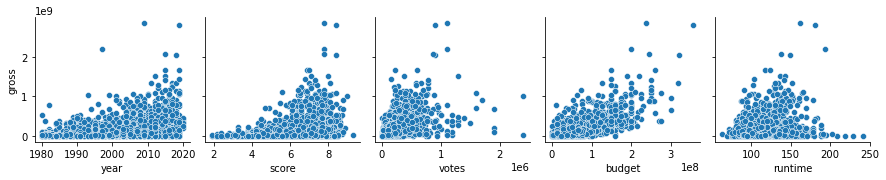

In [26]:
# pairplot of gross vs variables (year, budget, votes, score, runtime) 
sns.pairplot(train, x_vars=['year', 'score', 'votes', 'budget', 'runtime'], y_vars=['gross'])

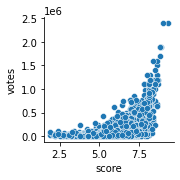

In [27]:
#plot of score vs votes
sns.pairplot(train, x_vars=['score'], y_vars=['votes'])

<AxesSubplot:xlabel='year', ylabel='gross'>

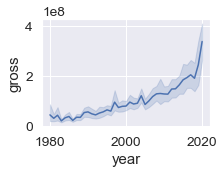

In [27]:
plt.rcParams['figure.figsize'] = [3, 2]
sns.lineplot(data = train, x = 'year', y = 'gross')

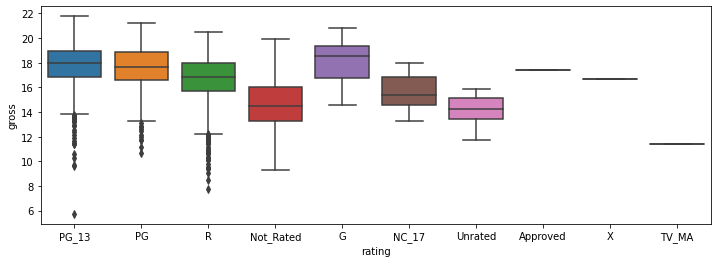

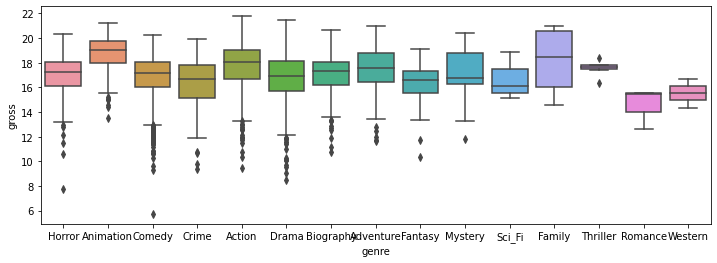

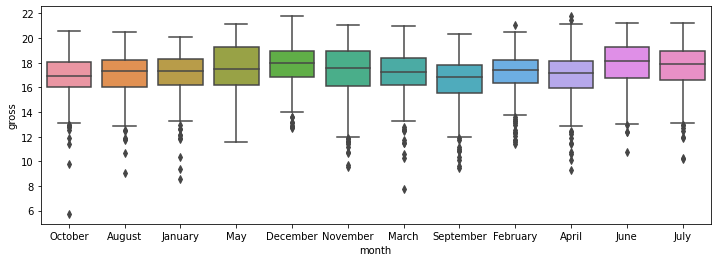

In [35]:
# visualizations of categorical variables vs gross - doing log(gross) so that it is easier to see the distributions
for col in ['rating','genre', 'month']:
    sns.boxplot(x = col, y = np.log(train.gross), data = train)
    plt.rcParams['figure.figsize'] = [12, 4]
    plt.show()

**Insights from EDA:**

- Insight 1: After doing a pairplot of numeric variables vs. `gross`, we found that `year`, `score`, `votes`, `budget`, and `runtime` seemed to be significant. This is due to the shapes each had. We saw that `gross` had a quadratic relationship with the numeric predictors, especially score. Therefore, we knew that we would likely have to transform `gross` in our model. Votes, budget, and runtime each had clusters in their plots with `gross` which indicate some more work (transformations/interactions) should be done on them.

- Insight 2: We also looked at other variables to see if there might be something we could use as an interaction term between themselves to help our model. After looking at `scores` and `votes`, we saw that there was a clear, sharp exponential increase between the two. We decided to keep this to further investigate in our model.

- Insight 3: `year` seemed to be related, however, our data spans over a large chunck of time (1986-2020). After making a lineplot, we saw that as `year` increased, so did our gross revenue (possibly due to inflation). 

- Insight 4: Lastly, we looked at some categorical variables. The ones that seemed of significance were `rating`, `genre`, and `month`. We created boxplots of each against the log of gross to better see the distributions of variables. We find that some genres were significant in relation to high-grossing movies (such as Family, Action, and Animation), some months seem to relate to high-grossing movies based on their IQR, and while ratings were similar in size, movies rated G seemed higher-grossing compared to movies of other ratings.

## Approach

What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? Did the very first model you tried work? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

We used a linear model. Since we were developing a model for inference purposes, we were interested in optimizing R-squared and adjusted R-squared since R-squared is an indication of a model's fit to the data, and adjusted R-squared would penalize us for adding unnecessary predictors to the model. However, we also were interested in comparing the RSE and RMSE of our data to detect and address any overfitting that was occurring between our model and the training data. We chose RMSE because we wanted to penalize larger errors for the sake of our stakeholders.

Our very first model, a “base” model with all the predictors and no interaction or transformation terms, did not work for the purpose of inference. There were multiple predictors that did not have any significance. There was also heteroskedasticity in the residual plot, which affected the p-values and our inference ability. Furthermore, the R-squared and adjusted R-squared values were fairly low considering our purpose was inference. Lastly, since the model did not consider any interaction terms or transformations, it omitted key relationships between the predictors that could help to better explain the response and thus better inform our stakeholders.

When we first tried to do variable selection with the categorical and continuous predictors, we encountered an issue in that some levels of the categorical predictors were found in the test data but not the training data, especially for the levels of `genre`. As a result, we tried to stratify the data based on `genre`. However, this created the same problem with other levels of other categorical variables, specifically `ratings`. In particular, there was a level of `rating` that was not in the training data but was in the test data. As a result of these issues, we initially did not try to do variable selection with any interactions for our model.

After our class presentation, we wanted to retry variable selection while considering interaction terms. We anticipated problems with the variable selection considering that we had categorical predictors in our model, each with many levels. We encountered this to be a problem when we tried to perform variable selection since including the interaction terms resulted in over 1,000 predictors; it would have taken approximately 15 hours to perform variable selection over this dataset. As such, we had to pivot and use an unorthodox approach to variable selection with interaction terms (only doing selection with the continuous variables) in order to solve this problem. While we would have wanted to do variable selection with all the predictors (categorical and continuous), it was not feasible given the number of predictors.

Our problem did not already have a solution.

## Developing the model

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

Using a base model— a model with all of the variables and no transformation or interaction terms—we identified significant predictors from those whose p-values were less than the statistically significant level (0.05, which is associated with the 95% confidence interval). `budget`, `votes`, and `score` were significant. Some of the categories of `genre` and `rating` were also significant. However, `runtime`, `continent`, and `year` did not seem significant. This base model provided us with a general idea of the linear associations between `gross` and the predictors and a starting point from which to build our model. 

Before building our model, we first wanted to check if our data satisfied the linearity and constant variance assumptions as well as check for potential problems such as multicollinearity and influential points. Through the residual plot from our base model (below), we saw that our model satisfied the linearity assumption since the residuals are distributed more or less in a similar manner on both sides of the line Residuals = 0 for all fitted values. However, we saw that there was non-constant variance of the error terms (heteroskedasticity), as the variance of errors seems to increase as the fitted values increase. Given this non-constant variance and the quadratic relationships we observed between `gross` and the predictors during our EDA, we knew that we would have to transform the response `gross` in our model through a square root. 

Text(0, 0.5, 'Residuals')

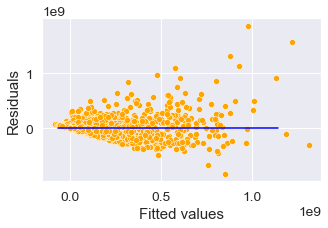

In [28]:
ols_object = smf.ols(formula = 'gross~budget+genre+rating+votes+continent+runtime+month+score+year', data = train)
model = ols_object.fit()
pred_gross = model.predict(test)
plt.rcParams["figure.figsize"] = (5,3)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_gross.min(),pred_gross.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

We also wanted to check for potential issues in the data, specifically  multicollinearity and influential points, before creating our model. We conducted a VIF test to check for multicollinearity. Since the VIFs for all the numeric variables were less than 2, we concluded that multicollinearity would not affect our model and inference ability (see 1 in Appendix). We also checked for influential points by finding the intersection of points that were both outliers and high leverage from our base model. We found 6 influential points in the dataset and removed them (moving forward, we use the 'train_filtered' dataset rather than the 'train' dataset since train_filtered has the same data as train but excludes the influential points).

In order to determine what variables to use in our model, we did variable selection. In order to prep the data for variable selection, we created dummy variables for the categorical variables (`genre`, `rating`, `month`, and `continent`). Since creating dummies from the categorical variables greatly increased the number of predictors in our dataset, we opted to do either forward or backward stepwise selection since subset selection would require too much computational power. Ultimately, we chose to use backwards stepwise selection because we suspected collinearity would be created from the dummy variables, and backwards selection may be forced to keep them in the model and remove them one-by-one but forward selection may not select any of the predictors. After backward stepwise selection was performed, the model with 8 predictors was chosen as the best model based on the Bayesian information criterion (BIC).

In the best model, all the predictors were significant with p-values less than 0.05. The model included two main numerical predictors: `budget` and `votes`, similar to our base model. The model also chose some levels of the categorical predictors that we had suspected to be associated with the response based on our EDA. For example, `Animation`, `Family`, and `Horror` were all selected as predictors, indicating that the predictor `genre` is associated with the response. `October` was also a predictor in the best model, indicating that `month` has an affiliation with `gross`. Lastly, the ratings `PG` and `PG-13` were in the best model, indicating that `rating` also affected `gross`.

We also wanted to consider interaction terms in our variable selection. However, due to the large number of predictors that resulted from the dummies of the categorical variables, it was not feasible to run backwards variable selection on all of the predictors and their interaction terms (as this would result in 1,000+ total predictors). Therefore, we decided instead to do backwards variable selection again considering interaction terms, but only the interaction terms between the quantitative variables. 

By doing variable selection again considering the interaction terms between the quantitative predictors and selecting the best model using BIC, we saw that many interaction terms were significant. Similar to the first variable selection, `budget` and `votes` were significant. However, `runtime` `year:score`, `year:votes`,  `year:budget`,  `year:runtime`, `score:votes`,  `score:budget`, `score:runtime`,  `votes:budget`,  and `votes:runtime` were also significant. While `year:score` and `budget:runtime` were also included in the best model, we did not include these in the construction of our final model since they were insignificant (their p-values were greater than 0.05)

Construction of our final model began by using the best model resulting from variable selection considering the interaction terms between the quantitative predictors. Therefore, all of the predictors that were significant (listed above) were included in the model. Then, we added in important categorical variables based on the results of the first backward variable selection (with the categorical variables as dummies) and our own intuition. Since levels of `genre`, `rating`, and `month` were found to be significant, we decided to include these three categorical variables in the model. However, we decided to create an interaction term between `genre` and `budget` because we knew logically that the genre of a movie affects its budget. For example, an action movie will typically have a larger budget than an indie movie. We wanted to reflect this relationship in the final model.

Once all of the interactions were considered, we also decided to add some transformation terms to improve the fit of our model. Based on our initial EDA, we knew that we would have to square root the response `gross` in our final model since all of the numeric variables reflected a quadratic relationship with gross. However, we were curious to see if there were still transformations of the predictors that could be made to improve the fit of the model. Therefore, we made scatterplots of the predictors against the square root of `gross` (see 2 in Appendix). This revealed that there was still a quadratic relationship between `score`, `runtime`, and `year` with the predictor. As such, we decided to add the quadratic transformations of `score`, `runtime`, and `year` to our model. 

**Our final model is:** $\sqrt{gross}$ = -20.6088 + 115.0340$*$month[T.August] + 674.0122$*$month[T.December] + 264.5873$*$month[T.February] + 195.2529$*$month[T.January] + 747.6659$*$month[T.July] + 515.3608$*$month[T.June] + -116.8465$*$month[T.March] + 20.3187$*$month[T.May] + 61.3943$*$month[T.November] + -282.4578$*$month[T.October] + -371.0486$*$month[T.September] + -853.5561$*$genre[T.Adventure] + 2420.0619$*$genre[T.Animation] + -132.5051$*$genre[T.Biography] + -272.5425$*$genre[T.Comedy] + -756.2698$*$genre[T.Crime] + -735.5822$*$genre[T.Drama] + 3.115e-06$*$genre[T.Family] + -659.9990$*$genre[T.Fantasy] + 189.9649$*$genre[T.Horror] + 827.7071$*$genre[T.Mystery] + -2.8311$*$genre[T.Romance] + -622.8405$*$genre[T.Sci_Fi] + 20.1654$*$genre[T.Thriller] + -0.0840$*$genre[T.Western] + 1687.6181$*$rating[T.G] + -680.8039$*$rating[T.NC_17] + -895.7904$*$rating[T.Not_Rated] + 1430.4271$*$rating[T.PG] + 786.7992$*$rating[T.PG_13] + -416.5639$*$rating[T.R] + -47.5224$*$rating[T.TV_MA] + -1827.9083$*$rating[T.Unrated] + -23.4879$*$rating[T.X] + -99.2200$*$year + 0.4320$*$votes +  -0.0002$*$year$*$votes + -0.0025$*$budget + 2.027e-05$*$genre[T.Adventure]$*$budget + 1.647e-05$*$genre[T.Animation]$*$budget + -1.057e-05$*$genre[T.Biography]$*$budget + 1.957e-05$*$genre[T.Comedy]$*$budget + 1.322e-05$*$genre[T.Crime]$*$budget + 1.429e-05$*$genre[T.Drama]$*$budget + 0.0014$*$genre[T.Family]$*$budget + 2.114e-05$*$genre[T.Fantasy]$*$budget + 1.803e05$*$genre[T.Horror]$*$budget + -5.874e-05$*$genre[T.Mystery]$*$budget + -0.0002$*$genre[T.Romance]$*$budget + -4.118e-05$*$genre[T.Sci_Fi]$*$budget + 0.0001$*$genre[T.Thriller]$*$budget + -6.905e-05$*$genre[T.Western]$*$budget + 1.227e-06$*$year$*$budget + 618.5294$*$score + -0.0136$*$score$*$votes + 1905.4534$*$runtime + -0.9160$*$year$*$runtime + 1.673e-05$*$score$*$budget + 16.2938$*$score$*$runtime + -1.447e-11$*$votes$*$budget + 5.464e-05$*$votes$*$runtime + -204.5110$*$score$^2$ + -0.7040$*$runtime$^2$ + 0.0487$*$year$^2$

See 3 in Appendix for the final model summary.

The residual plot for our final model is:

Text(0, 0.5, 'Residuals')

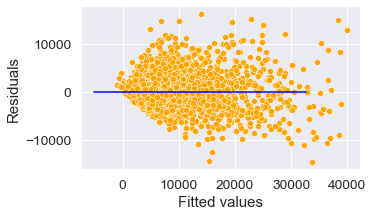

In [29]:
ols_object = smf.ols(formula = 'np.sqrt(gross)~year*votes+year*budget+score*votes+year*runtime+score*budget+score*runtime+votes*budget+votes*runtime+month+genre*budget+rating+I(score**2)+I(runtime**2)+I(year**2)', data = train_filtered)
model= ols_object.fit()
pred_gross = model.predict(test)
plt.rcParams["figure.figsize"] = (5,3)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_gross.min(),pred_gross.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

We succeeded in achieving our goal because we created a model that provides information about the association of key characteristics of a movie and the movie’s gross revenue while satisfying the important criteria that are necessary for a successful inference model.

Based on the residual plot above, our model satisfies the linearity assumption, allowing us to draw accurate conclusions from our linear model about the relationship between the predictors and response. Furthermore, after transformation of the response `gross`, our model now also has constant variance in the error terms, which allows us to correctly estimate the true standard errors and thus the p-values (significance levels) of the predictors. Furthermore, the indication of little multicollinearity through the VIF values and the removal of influential points also improves the inference ability of our model.

We would also say that we were successful in achieving a good model for inference. Our R-squared value was 0.792, indicated that almost 80% of the variance in the response variable is explained by our model. Furthermore, our adjusted R-squared was 0.791, indicating that the model is not paying a large price for unnecessary variables (and thus does not have many unnecessary variables). Furthermore, we would say that we were successful in achieving a good model for inference based on the comparison of the RSE to RMSE. While we were not focused on prediction, we decided to use RSE and RMSE as a means to determine if our model was overfitting to the training data. Our RSE and RMSE were 8,613,681 USD and 9,141,194 USD  of gross revenue respectively. Given the distribution of the `gross` variable, our RSE and RMSE were fairly low and close to one another, indicating that our model was not overfitting to the data. 

Lastly, we were successful because we were able to create an interpretable model that can be used to help our stakeholders. By recognizing and removing missing data points, transforming previously unusable predictors into usable ones, and performing variable selection, we were able to create a model that can benefit our stakeholders.

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

There are some limitations that come from the dataset alone. For example, we don't know how this dataset was constructed. While this dataset had originally picked 220 movies per year from 1986-2020, we don't know if this picked movies at random or chose some criterion (such as Oscar wins or revenue itself) that is not known to the public. Thus, there could be some bias there. Another limitation is that for some predictors, there were not enough observations to be able to do meaningful analysis on. For example, there were only 6 Sci-Fi movies and 2 Western movies. Thus these specific genres could carry more significance that we were able to see, but unfortunately our dataset was too small.

This limitation bleeds into our model. Our model found that some genres, like the aforementioned genres of Sci-Fi, Western and more, were not statistically significant. However, there are many blockbuster movies that fit into these genres from this time frame like Tombstone and The Matrix. Thus, our model may not hold for a good chunk of genres that were not well-represented in our dataset.

In our model, we wanted to do forward selection using a majority of our predictors and their 2-factor interactions to help our model. However, after creating dummy variables for the variables we found to be significant in our EDA, we had too many variables to be able to run the code (over 1326 predictors!). Thus, if we had a better machine that execute the forward selection algorithm very quickly, we might be able to have a more precise model. However, due to the computational inefficiency, we kept to a mix variable selection and intuition.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Based on our model, we concluded that the top 10 statistically significant predictors (at the 95% significance level) with the largest (absolute value) coefficients were the `genre` animation (2420.01927), `runtime` (1905.453358),  the `rating` unrated (-1827.908264), the `rating` G (1687.618101), the `rating` PG (1430.427122), the `genre` adventure (-853.556072), the `rating` PG-13 (786.799237), the `genre` crime (-756.269835), the `month` July (747.665854), and the `genre` drama (-735.582160) (see 4 in Appendix).

Based on the coefficients and statistical significance of many of the genres and rating levels, we think that the rating and genre of a movie  is of major importance for studio bottom lines. If maximizing revenue is the goal, then studios should focus most of their budget into major motion animation pictures, rated G or PG, that are appropriate for all ages since their mass appeal to all ages seems to make them the most commercially viable big-budget film genre and ratings. Making movies rated PG-13 is also recommended since this rating also has a positive association with gross revenue. Furthermore, releasing a movie in July is linked with higher revenues. In contrast, the crime and drama genres are not recommended as they are negatively associated with gross revenue. It is also suggested that studios should not produce unrated movies, as this tends to have a negative relationship with revenue. These recommendations also apply to those who are looking to have their work adapted into film; creating content that falls within the animation genre and is suitable for many individuals/families (ratings G, PG, and PG-13) may improve the chance of one’s work getting adopted into film, as studios are often interested in work that is high grossing. Reaching a maximum audience comes before all else, so widespread and effective marketing campaigns are important in addition to these recommendations.

As for everyday moviegoers like us, since genres and ratings are so critical to the revenue of a movie, we suggest opting to watch movies that are animated or adventure and those that are rated G, PG, or PG-13. Since these are most associated with revenue, and revenue is typically associated with a movie being good and worthwhile, we suggest these genres/rating to enhance one’s movie experience and improve the probability of watching a movie that one enjoyed.

To make some of these recommendations more specific and applicable, further research into which movie pitches have succeeded or failed, audience perceptions across a variety of online rating services, and audience turnout at a variety of levels (local, national, and international), would be helpful. The stakeholders should be aware that our model is limited in certain manners. For instance, we don’t know how the movies in our dataset were picked (e.g. whether or not there was a bias in terms of the genre of movies selected). As a result, we cannot explain the several NaN values found in decade and genre interaction terms.

We anticipate our model being useful in the near future with consistently updated data. However, it may break down in the future if the movie scene shifts dramatically. For instance, if streaming really takes off and movie theaters become irrelevant, or if the rating sites we mention become defunct and other sites become more dominant, or if new genres of movie come into fashion which our model doesn't account for, then our model may be limited in its inference ability in the future.

## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

https://github.com/isabelgabrielaknight/final-project-303-2

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Lilly Sorkin</td>
    <td>Data quality check, cleaning and preparation</td>
    <td>Cleaned data to discard non-informative values and transformed some predictors so that they could be used in model development.</td>
    <td>21</td>
  </tr>
  <tr>
    <td>Isabel Knight</td>
    <td>EDA</td>
    <td>Developed visualizations to identify appropriate variable transformations and important relationships to be used for variable selection.</td>
    <td>14</td>
  </tr>
    <tr>
    <td>Aarti Pappu</td>
    <td>Data preparation, influential points treatment, assumptions, interactions, variable selection</td>
    <td>Also transformed some predictors so they could be used in model development. Identified and remove influential points from the dataset based on the base model. Checked and addressed linearity and non-constant variance assumptions. Checked for multicollinearity. Performed variable selection on an exhaustive set of predictors in order to develop final model. Also checked for overfitting in the final model.</td>
    <td>61</td>    
  </tr>
    <tr>
    <td>Atharva Weling</td>
    <td>Conclusions/Recommendations</td>
    <td>Identified most significant variables in model to develop important conclusions for stakeholders.</td>
    <td>6</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

One challenge our team faced when collaborating on GitHub was having conflicts when attempting to merge our work with the main branch. We didn’t know how to manually resolve the conflicts, especially since the app would open in Visual Studio Code to resolve conflicts, so we often ended up just creating a copy of the document we had modified and added it to the main branch. 

Another challenge we faced was using the branches that were designated for each team member. Since we often worked on the project one-at-a-time and did not know how to manually resolve conflicts, the branches for each individual team member often went unused as it was easier to directly pull and push commits to and from the main branch. There were some issues of branches not being updated with the most up-to-date files. This issue can be attributed to being novices at using GitHub; the resolution for most members was to only use the main branch instead of personal ones.

Since none of us had any experience with GitHub before this class, we feel slightly more comfortable using GitHub than we did before this class. While it was a steep learning curve and slightly annoying when there were conflicts, we do think GitHub made collaboration easier since we were able to edit and modify documents and have the rest of our team directly see the edits and modifications without the need to manually send or share files each time. In the future, it will be easier to understand the expectations of group projects when using GitHub based on our experiences.

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Grijalva, D. (n.d.). Movie Industry. Retrieved from https://www.kaggle.com/datasets/danielgrijalvas/movies. 


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.

1. VIF values that determined multicollinearity was not affecting our model:

In [6]:
X = train[['year', 'votes', 'score', 'runtime', 'budget']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

   feature           VIF
0    const  40962.023000
1     year      1.129782
2    votes      1.655555
3    score      1.511912
4  runtime      1.356838
5   budget      1.496755


2. Scatterplots of the square root of gross against 'budget' and 'votes', and a lineplot of the square root of gross against 'year', that informed us to add the quadratic transformations of 'budget' and 'votes' to the final model:

<AxesSubplot:xlabel='year', ylabel='gross'>

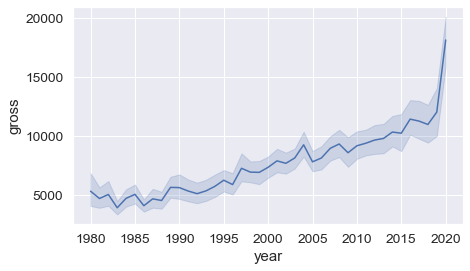

In [8]:
sns.lineplot(data = train_filtered, x = 'year', y = np.sqrt(train_filtered.gross))

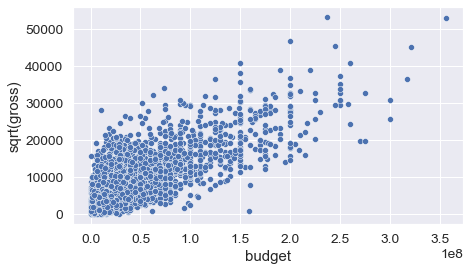

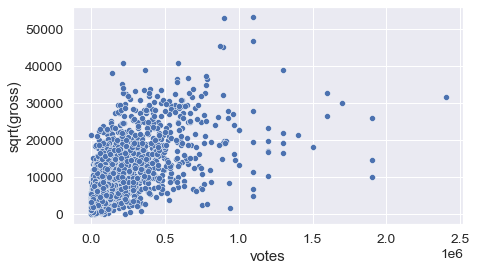

In [7]:
cols = ['budget','votes']
for col in cols:
    plt.rcParams["figure.figsize"] = (7,4)
    sns.set(font_scale=1.25)
    sns.scatterplot(x = col, y = np.sqrt(train_filtered.gross), data = train_filtered)
    plt.ylabel('sqrt(gross)')
    plt.show()

3. The final model summary:

In [17]:
ols_object = smf.ols(formula = 'np.sqrt(gross)~year*votes+year*budget+score*votes+year*runtime+score*budget+score*runtime+votes*budget+votes*runtime+month+genre*budget+rating+I(score**2)+I(runtime**2)+I(year**2)', data = train_filtered)
model= ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(gross)   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     564.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:41:35   Log-Likelihood:                -40673.
No. Observations:                4327   AIC:                         8.141e+04
Df Residuals:                    4297   BIC:                         8.160e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -20.6088     55.284     -0.373      0.709    -128.993      87.776
month[T.August]             115.0340    218.536      0.526      0.599    -313.409     543.477
month[T.December]           674.0122    227.199      2.967      0.003     228.584    1119.440
month[T.February]           264.5873    228.108      1.160      0.246    -182.622     711.796
month[T.January]            195.2529    229.489      0.851      0.395    -254.663     645.169
month[T.July]               747.6659    224.198      3.335      0.001     308.121    1187.210
month[T.June]               515.3608    227.184      2.268      0.023      69.963     960.759
month[T.March]             -116.8465    222.930     -0.524      0.600    -553.905     320.212
month[T.May]                 20.3187    234.176      0.087      0.931    -438.787     479.425
month[T.November]            61.3943    224.071      0.274      0.784    -377.900     500.688
month[T.October]           -282.4578    214.296     -1.318      0.188    -702.588     137.673
month[T.September]         -371.0486    229.181     -1.619      0.106    -820.363      78.265
genre[T.Adventure]         -853.5561    290.260     -2.941      0.003   -1422.615    -284.497
genre[T.Animation]         2420.0619    419.995      5.762      0.000    1596.655    3243.469
genre[T.Biography]         -132.5051    344.975     -0.384      0.701    -808.834     543.824
genre[T.Comedy]            -272.5425    192.779     -1.414      0.158    -650.489     105.405
genre[T.Crime]             -756.2698    295.255     -2.561      0.010   -1335.121    -177.418
genre[T.Drama]             -735.5822    214.506     -3.429      0.001   -1156.125    -315.040
genre[T.Family]            3.115e-06   7.47e-06      0.417      0.677   -1.15e-05    1.78e-05
genre[T.Fantasy]           -659.9990    656.974     -1.005      0.315   -1948.008     628.010
genre[T.Horror]             189.9649    310.574      0.612      0.541    -418.920     798.850
genre[T.Mystery]            827.7071   1446.717      0.572      0.567   -2008.605    3664.019
genre[T.Romance]             -2.8311     11.732     -0.241      0.809     -25.831      20.169
genre[T.Sci_Fi]            -622.8405   1771.367     -0.352      0.725   -4095.635    2849.954
genre[T.Thriller]            20.1654     28.608      0.705      0.481     -35.921      76.252
genre[T.Western]             -0.0840      1.630     -0.052      0.959      -3.279       3.111
rating[T.G]                1687.6181    383.652      4.399      0.000     935.463    2439.773
rating[T.NC_17]            -680.8039    805.911     -0.845      0.398   -2260.805     899.198
rating[T.Not_Rated]        -895.7904    528.452     -1.695      0.090   -1931.828     140.247
rating[T.PG]               1430.4271    211.964      6.748      0.000    10

4. Determining the top 10 significant predictors with the largest (absolute value) coefficients. However, the actual coefficients were pulled from the model summary since the following table reflects the absolute value of the coefficients (and will not show any negatives). 

In [18]:
params_sorted = abs(model.params).sort_values(ascending=False)
params_df = pd.DataFrame(params_sorted, columns=['coefficient'])
params_df['p_value'] = model.pvalues
params_df.loc[params_df['p_value'] <= 0.05].head(10)

,coefficient,p_value
genre[T.Animation],2420.061927,8.887228e-09
runtime,1905.453358,9.347007e-04
rating[T.Unrated],1827.908264,4.355269e-03
rating[T.G],1687.618101,1.114712e-05
rating[T.PG],1430.427122,1.693581e-11
genre[T.Adventure],853.556072,3.292583e-03
rating[T.PG_13],786.799237,3.488782e-04
genre[T.Crime],756.269835,1.045851e-02
month[T.July],747.665854,8.607171e-04
genre[T.Drama],735.582160,6.110796e-04
